## Geometric Brownian Motion

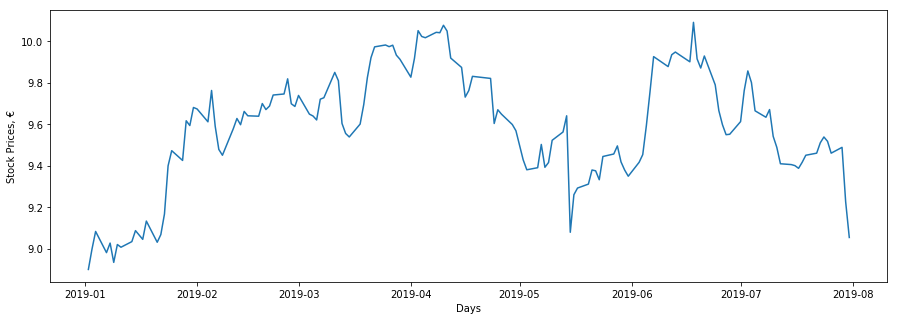

In [172]:
import quandl as q
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

prices = quandl.get("FSE/EON_X", 
                authtoken="svd3McyFY66xxiMBTtzf", 
                start_date = '2019-01-01', end_date = '2019-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
#print(prices.head())
#prices.dtypes

plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

In [173]:
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

### Use E.ON’s stock prices of July to make predictions for August

In [174]:
start_date = '2019-07-01'
end_date = '2019-07-31'
pred_end_date = '2019-08-31'

S_eon = quandl.get("FSE/EON_X", 
               authtoken="svd3McyFY66xxiMBTtzf", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]

print(S_eon.head())
print(S_eon.tail())

        Date  Close
0 2019-07-01  9.612
1 2019-07-02  9.761
2 2019-07-03  9.856
3 2019-07-04  9.800
4 2019-07-05  9.664
         Date  Close
18 2019-07-25  9.517
19 2019-07-26  9.460
20 2019-07-29  9.488
21 2019-07-30  9.226
22 2019-07-31  9.054


In [175]:
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
print(So)

9.054


In [176]:
dt = 1

In [177]:
n_of_wkdays = pd.date_range(
            start = pd.to_datetime(end_date, format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
            end = pd.to_datetime(pred_end_date, format = "%Y-%m-%d")).to_series().map(
            lambda x: 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays

print(T)
print(pd.to_datetime(end_date, format = "%Y-%m-%d") + pd.Timedelta('1 days'))
print(pd.to_datetime(pred_end_date, format = "%Y-%m-%d"))

22
2019-08-01 00:00:00
2019-08-31 00:00:00


In [178]:
N = T / dt
t = np.arange(1, int(N) + 1)
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [179]:
returns = (S_eon.loc[1:, 'Close'] - S_eon.shift(1).loc[1:, 'Close']) / S_eon.shift(1).loc[1:, 'Close']
print(returns.tolist())
mu = np.mean(returns)
print(mu)

[0.015501456512692377, 0.00973260936379476, -0.005681818181818097, -0.013877551020408265, -0.0032077814569537026, 0.00384096335513348, -0.013340227507755901, -0.005554973273241884, -0.008326306913996506, -0.0004251248804337693, -0.0005316321105793732, -0.0013829787234042447, 0.0030893789283050936, 0.0036108751062020944, 0.0010582010582012237, 0.0052854122621563355, 0.002944269190326022, -0.0022017194380374075, -0.0059892823368707165, 0.0029598308668074727, -0.0276138279932545, -0.018642965532191694]
-0.002670599669333055


In [180]:
sigma = np.std(returns)
print(sigma)

0.009362443851856311


In [146]:
scen_size = 2
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
print(b)

{'1': array([-1.37206788e+00, -1.15985172e+00,  2.51524404e-01, -2.75680373e-03,
       -4.57196335e-01,  7.68872896e-01, -1.38020944e-01, -1.56218440e+00,
        6.88399359e-02, -1.48159072e-01, -4.12376509e-01, -1.94111706e-01,
        1.79163707e+00,  6.23378823e-01,  1.31321893e-03,  2.35937022e-01,
        2.32430055e-01, -1.91417809e-01, -3.18410807e-01, -6.31593838e-01,
       -7.30558312e-01, -5.12493061e-01]), '2': array([ 1.24014428, -0.24059096, -0.60180847, -0.40049591,  1.11277532,
        1.16460308, -0.13335204, -0.58236184, -0.38240484, -0.30468483,
        0.14156291,  0.86595257, -0.65343318, -0.12129042,  0.12364541,
       -0.84859356,  0.22597027,  0.19691403, -0.27603866,  0.1546229 ,
        1.69225456,  0.15801291])}


In [147]:
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
print(W)

{'1': array([-1.37206788, -2.5319196 , -2.28039519, -2.283152  , -2.74034833,
       -1.97147544, -2.10949638, -3.67168078, -3.60284084, -3.75099991,
       -4.16337642, -4.35748813, -2.56585106, -1.94247223, -1.94115901,
       -1.70522199, -1.47279194, -1.66420975, -1.98262055, -2.61421439,
       -3.3447727 , -3.85726576]), '2': array([ 1.24014428,  0.99955332,  0.39774485, -0.00275105,  1.11002426,
        2.27462734,  2.1412753 ,  1.55891347,  1.17650862,  0.87182379,
        1.0133867 ,  1.87933927,  1.22590609,  1.10461567,  1.22826108,
        0.37966751,  0.60563778,  0.80255181,  0.52651315,  0.68113605,
        2.3733906 ,  2.53140351])}


## Drift and Diffusion

* longer-term trend in the stock prices
* shorter-term random fluctuations

In [148]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print("diffusion:\n", diffusion)

drift:
 [-0.00271443 -0.00542885 -0.00814328 -0.01085771 -0.01357214 -0.01628656
 -0.01900099 -0.02171542 -0.02442985 -0.02714427 -0.0298587  -0.03257313
 -0.03528756 -0.03800198 -0.04071641 -0.04343084 -0.04614526 -0.04885969
 -0.05157412 -0.05428855 -0.05700297 -0.0597174 ]
diffusion:
 {'1': array([-0.01284591, -0.02370496, -0.02135007, -0.02137588, -0.02565636,
       -0.01845783, -0.01975004, -0.03437591, -0.0337314 , -0.03511853,
       -0.03897938, -0.04079674, -0.02402264, -0.01818629, -0.01817399,
       -0.01596505, -0.01378893, -0.01558107, -0.01856217, -0.02447544,
       -0.03131525, -0.03611343]), '2': array([ 1.16107812e-02,  9.35826184e-03,  3.72386387e-03, -2.57565947e-05,
        1.03925398e-02,  2.12960707e-02,  2.00475698e-02,  1.45952398e-02,
        1.10149959e-02,  8.16240133e-03,  9.48777608e-03,  1.75952084e-02,
        1.14774770e-02,  1.03419022e-02,  1.14995254e-02,  3.55461578e-03,
        5.67024971e-03,  7.51384624e-03,  4.92944980e-03,  6.37709799e-03,
  

In [149]:
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))

print(S)

[[9.054      8.91420715 8.79402786 8.79086659 8.7668105  8.70570149
  8.7448264  8.70985912 8.56012956 8.54242912 8.50746361 8.45170816
  8.41349347 8.53261993 8.55929972 8.53620258 8.53188879 8.52729719
  8.48895483 8.44074315 8.36823229 8.28866093 8.22662473]
 [9.054      9.13490694 9.08964684 9.01407488 8.95599538 9.02525765
  9.09946987 9.06348068 8.98976286 8.93335299 8.88375899 8.87142755
  8.91940044 8.84096975 8.80699743 8.79329733 8.70006439 8.69485641
  8.68728796 8.64137729 8.63043751 8.74449545 8.73370231]]


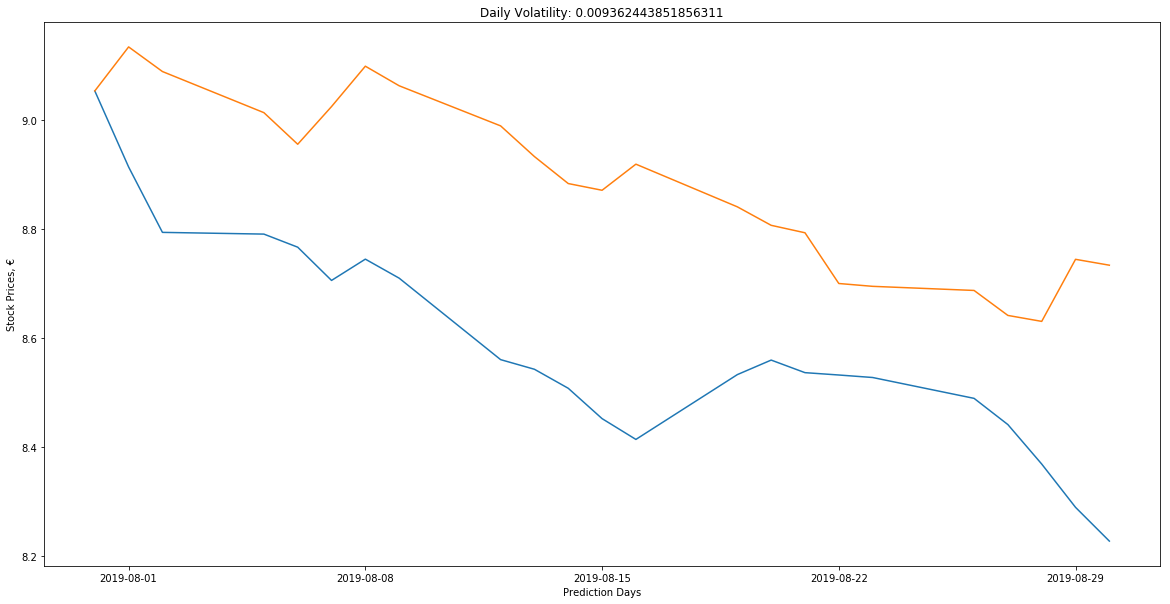

In [155]:
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])

plt.title("Daily Volatility: " + str(sigma))
plt.ylabel('Stock Prices, €')
plt.xlabel('Prediction Days')

plt.show()

### SH EX quote not availabel to recent days from quandl, check template 'GBM_SHSE_600800' using tushare instead

In [153]:
S_eon_SH = quandl.get("XSHG/600004",
               authtoken="svd3McyFY66xxiMBTtzf", 
               start_date = '2018-12-30', end_date = '2019-01-31'
               ).reset_index(drop = False)[['Date', 'Close']]
S_eon_SH.tail()

,Date,Close
0,2018-12-31,9.95265
